## Pymaceuticals Inc.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\sarit\OneDrive\Desktop\Class_Folder\mygithub\Pymaceuticals-Inc\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\sarit\OneDrive\Desktop\Class_Folder\mygithub\Pymaceuticals-Inc\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#mouse_metadata.reset_index(drop=True, inplace=True)
#study_results.reset_index(drop=True, inplace=True)

result_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
result_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

num_unique_mice = result_df["Mouse ID"].nunique()
num_unique_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicate_mice = result_df[result_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
 
print(duplicate_mice["Mouse ID"].unique())


['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = result_df[result_df["Mouse ID"] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

cleaned_df = result_df[result_df["Mouse ID"] != 'g989'].copy()
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

num_unique_mice_cleaned = cleaned_df["Mouse ID"].nunique()
num_unique_mice

249

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

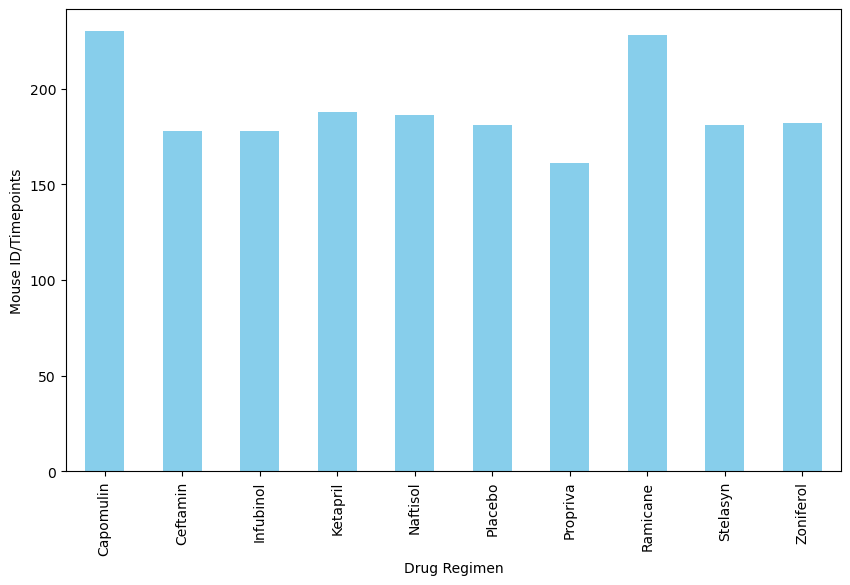

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = result_df.groupby('Drug Regimen').size()


ax = drug_regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Set the ylabel and xlabel
ax.set_ylabel('Mouse ID/Timepoints')
ax.set_xlabel('Drug Regimen')


# Show the plot
plt.show()


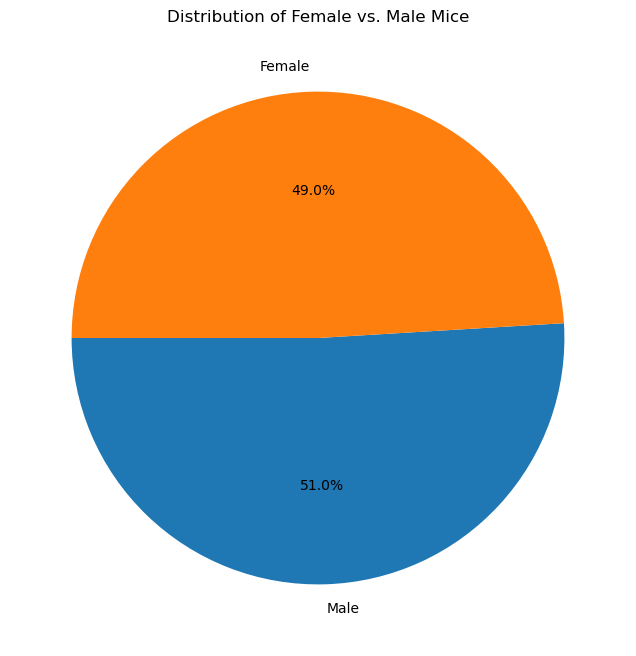

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_df["Sex"].value_counts()

fig, ax = plt.subplots()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=180, figsize=(8, 8), ax=ax)
ax.set_title('Distribution of Female vs. Male Mice')
ax.set_ylabel('')  # Remove the y-label for cleaner presentation
plt.show()

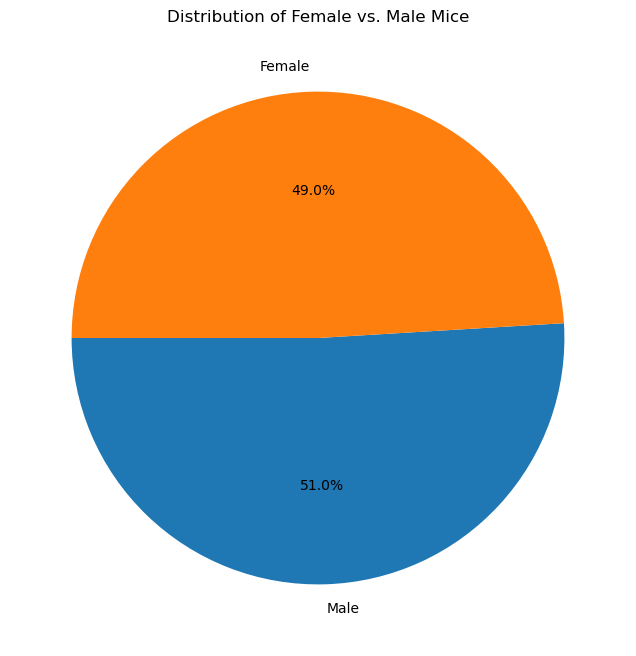

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the distribution of female versus male mice
gender_distribution = cleaned_df["Sex"].value_counts()

# Create a pie plot using Matplotlib's pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Get the last (greatest) timepoint for each mouse
max_timepoint_per_mouse = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the max_timepoint_per_mouse DataFrame with the original cleaned DataFrame to get the tumor volume at the last timepoint
merged_df = max_timepoint_per_mouse.merge(cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the merged DataFrame for the specified treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
specific_treatments_df = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the DataFrame with the final tumor volume for each mouse in the specified treatment regimens

print(specific_treatments_df)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
3       a275         45           62.999356                 3     Ceftamin   
6       a411         45           38.407618                 1     Ramicane   
7       a444         45           43.047543                 0     Ramicane   
..       ...        ...                 ...               ...          ...   
238     y769         45           68.594745                 4     Ceftamin   
239     y793         45           31.896238                 2    Capomulin   
240     y865         45           64.729837                 3     Ceftamin   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   

        Sex  Age_months  Weight (g)  
0    Female          20  

In [12]:

# List of treatments for the for loop and plot labels
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# Create an empty list to store tumor volume data for plotting
tumor_volume_data = []



# Loop through each treatment in the treatments list
for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = specific_treatments_df.loc[specific_treatments_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Check for potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")




Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


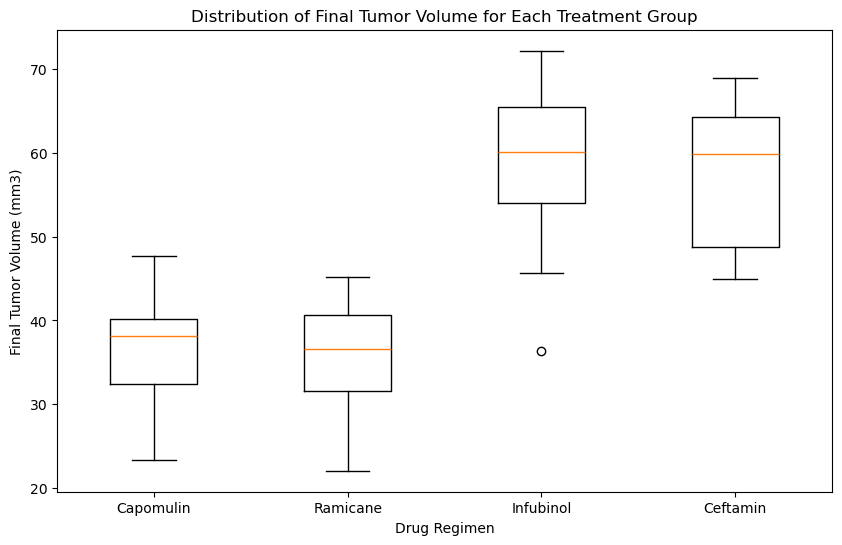

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data = [specific_treatments_df[specific_treatments_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]


plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

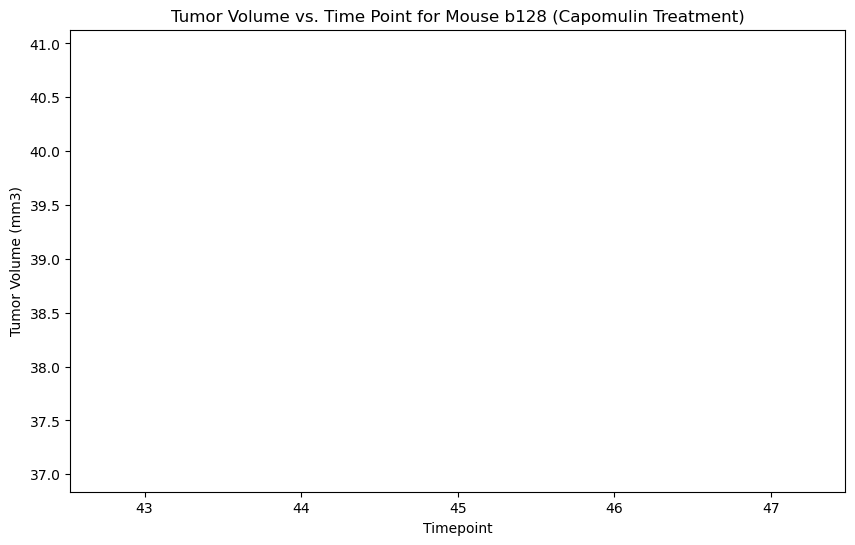

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
capomulin_data = specific_treatments_df[specific_treatments_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse ID from the filtered data
mouse_id = capomulin_data['Mouse ID'].iloc[0]  # Choose the first mouse ID for example

# Filter the data for the selected mouse
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='b', linestyle='-')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.show()










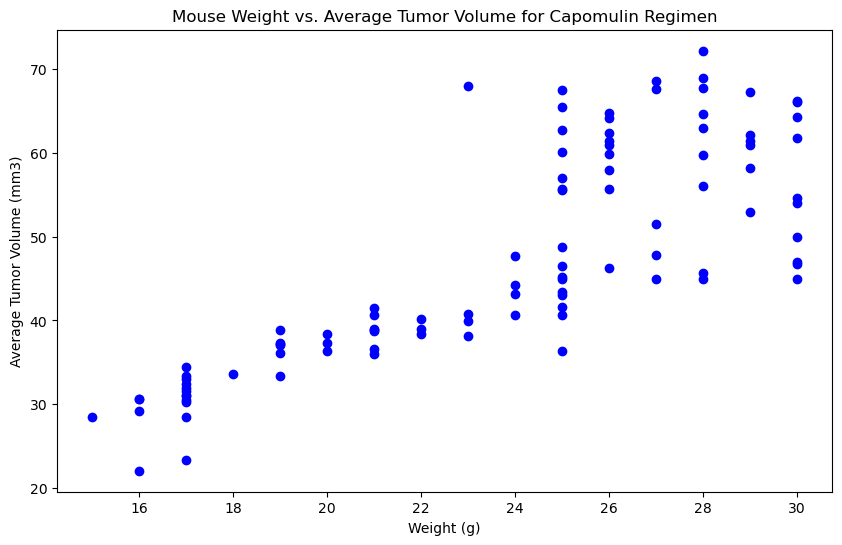

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = specific_treatments_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Calculate the average weight for each mouse in the Capomulin regimen
average_weight = specific_treatments_df.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(average_weight, average_tumor_volume, color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()





